### Henry Chang HW3 Regression and Data Profcessing for Machine Learning with Prof. Sven Anderson

#### Goals:
Using SciKitLearn, load the data from the local directory and build a regression model to  predict the final column from the other columns. 

In [1]:
# load necessary libraries 
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import sys # Python ≥3.5 is required
assert sys.version_info >= (3, 5)
import os

import sklearn # Scikit-Learn ≥0.20 is required
assert sklearn.__version__ >= "0.20"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

##### Load Data from csv into pandas
After veiwing the data, in pandas table, we see they are reltively close in scale and no more than x1000 of each other, so we use the original dataset instead of their z-score for this particular dataset.

In [94]:
# The data in DataProblem.csv consists of 
# a header of seven columns followed by
# 10,000 data point
data = pd.read_csv(filepath_or_buffer="DataProblem.csv", header = 0, usecols = range(1,8))
data

,0,1,2,3,4,5,6
0,0.492552,721.082614,5.042228,5.734170,2.112189,1.0,8.839982
1,4.390627,152.174641,6.075001,-78.633467,1.761183,3.0,-43.317974
2,-4.704564,655.334927,-0.742042,105.609595,1.543370,1.0,59.738018
3,-3.068747,789.916294,2.354023,20.049982,4.242583,4.0,8.852986
4,1.553264,346.778534,4.814482,3.598750,-0.491743,2.0,10.701917
...,...,...,...,...,...,...,...
9995,2.471096,300.955890,2.683012,-10.337859,0.782186,3.0,-2.278556
9996,-0.996662,370.753199,0.970519,7.284112,-3.684173,0.0,25.793811
9997,-4.190821,326.822124,-3.158497,75.902756,3.688309,2.0,29.734586
9998,-1.805299,280.668630,1.087589,13.862326,1.630465,4.0,6.022675


##### Split dataset into training and testing datatest

In [89]:
# use the first 8000 items for training and the final 2000 for testing.
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, shuffle = False, test_size = 0.2, train_size = 0.8)

In [90]:
# split the last column as the output Y and the rest input X
cols = train_data.columns
trainY = train_data[cols[-1:]]
trainX = train_data[cols[:-1]]

##### Train a linear regression model 

In [91]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(trainX, trainY)
print("The coefficient of determination R^2 is %s" % reg.score(trainX, trainY))
print("The weights found are", reg.coef_[0])
print("The intercept found is" , reg.intercept_[0])

The coefficient of determination R^2 is 1.0
The weights found are [ 2.02027773e-15  2.00000000e-02  3.32481829e-16  5.00000000e-01
 -4.00000000e+00  1.13085336e-16]
The intercept found is -3.375077994860476e-14


#### Analysis:
**Look into $R^2$ scoring of the linear regression model and use it as a summary statistic. Explain how you
interpret the R2 values.**   
</br>

The coefficient of determination $R^2$ = 1, means that the /linear regression model fits training data perfectly. The fitted function successfully maps every datapoint onto the desired output. 

**Can you eliminate any of the variables and still obtain a good solution? Rank the variables in order of importance as predictors in your final solution.**  </br>

Yes, if we look at the weights of the functions, some of them are extremely small compared to others. Call the weights for the ith column $w_i$. Then we can sort their importance by their magnitude: $w_5 > w_4 > w_2 > w_1 > w_3 > w_6$. See the bottom of this notebook for a little experiment on the result.

The plot of predicted testing values versus the actual testing values in a 2-D plot. 

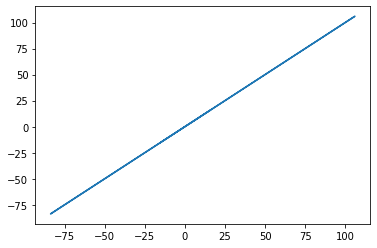

In [95]:
pred_val = reg.predict(test_data[cols[:-1]])
test_val = test_data[cols[-1:]].to_numpy()
plt.plot(test_val, pred_val)

This line is a perfect x=y graph. In other words, pred_val = test_val and the linear regression is flawless on the testing dateset. 

#### Which columns actually matter?
To see which columns actually matter, we write a remove_columns function to perform linear regression with certian columns removed.

In [143]:
# split the last column as the output Y and the rest input X
def remove_columns(C):
    # sample input C = ['0', '5'] 
    trainY = train_data[cols[-1:]]
    trainX = train_data[cols[:-1].delete(C)]
    reg = LinearRegression().fit(trainX, trainY)
    r_2 = reg.score(trainX, trainY)
    print("Removing weights with index", C)
    print("The coefficient of determination R^2 is %s" % r_2)
    pred_val = reg.predict(test_data[cols[:-1].delete(C)])
    test_val = test_data[cols[-1:]].to_numpy()
    plt.scatter(test_val, pred_val)
    plt.show()
    return r_2

Let's see how much each column affects the linear regression.

Removing weights with index 0
The coefficient of determination R^2 is 1.0


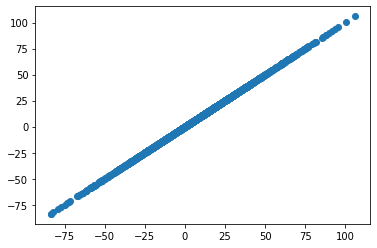

Removing weights with index 1
The coefficient of determination R^2 is 0.9568115733994982


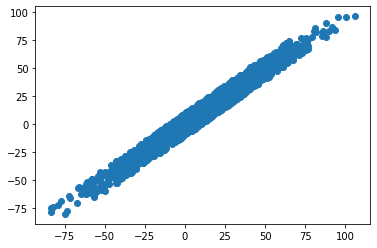

Removing weights with index 2
The coefficient of determination R^2 is 1.0


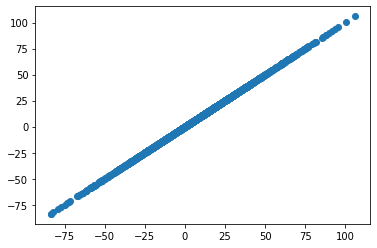

Removing weights with index 3
The coefficient of determination R^2 is 0.8524805313907144


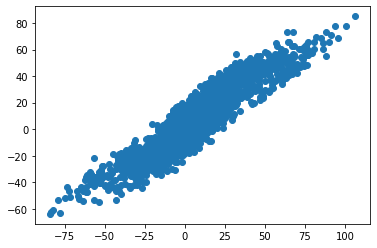

Removing weights with index 4
The coefficient of determination R^2 is 0.8113992161939825


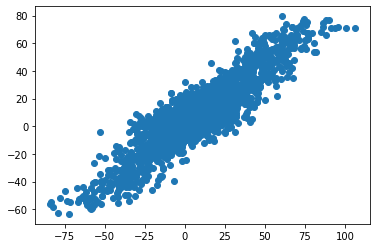

Removing weights with index 5
The coefficient of determination R^2 is 1.0


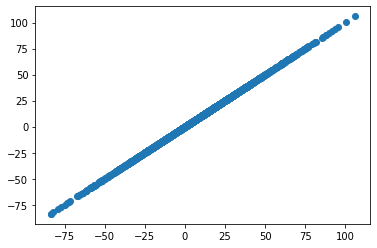

In [145]:
weights = {}
for i in range(6):
    r_2 = remove_columns(str(i))
    weights[i] = r_2

In [168]:
weights_by_importance = sorted(weights.items(), key = lambda kv:(kv[1], kv[0]))
weights_by_importance

[(4, 0.8113992161939825),
 (3, 0.8524805313907144),
 (1, 0.9568115733994982),
 (0, 1.0),
 (2, 1.0),
 (5, 1.0)]

The above cell prints out (i, r_2), where the ith column is removed and the corresponding $R^2$, so we conclude that removing column 0, 2 and 5 doesn't change the result of the linear regression. Now that's try to verify that:

Removing weights with index ['0', '2', '5']
The coefficient of determination R^2 is 1.0


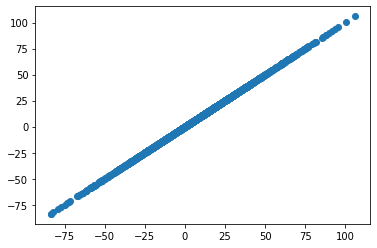

1.0

In [175]:
remove_columns(['0', '2', '5'])

In contrast, removing the other three important columns changes the result significanlty. 

Removing weights with index ['1', '3', '4']
The coefficient of determination R^2 is 0.6207393040414884


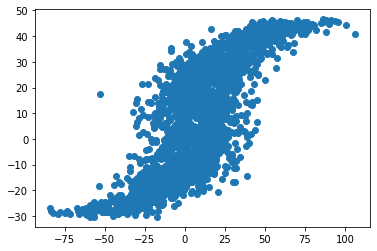

0.6207393040414884

In [178]:
remove_columns(['1', '3', '4'])